Question 2

The following differential equations are given:
$$\frac{d^2x}{dt^2} = -b\frac{dx}{dt}$$
$$\frac{d^2y}{dt^2} = -g - b\frac{dy}{dt}$$

variables:
air resistence: $-\beta\vec{v}$
velocity: $\vec{v}$
coefficient of air resistence: $\beta$ in $kg\cdot Hz$
mass: $m$

We can write the frequency in $Hz$ as the following: $b = \frac{\beta}{m}$

A. write the equations in dimensionless form

$\dot{x} = v_x$, $\dot{y} = v_y$, $\dot{v_x} = -bv_x$, $\dot{v_y} = -g - bv_y$

$x = \chi x'$, $y = \chi y'$, $t = \tau t'$, $v_x = v_0v_x'$, $v_y = v_0v_x'$

$$\frac{v_0}{\tau}\dot{v_x'} = -bv_ov_x'$$ $$\frac{v_0}{\tau}\dot{v_y'} = -g - bv_ov_y'$$ $$\frac{\chi}{\tau}\dot{x} = v_0v_x'$$ $$\frac{\chi}{\tau}\dot{y} = v_0v_y'$$

$\xi_0' = \bigg[-v_x', -(1 + v_y'), v_x', v_y'\bigg]$

$$\xi'_{n+1} = \xi_n' + \zeta(\xi', t)dt$$

B. write a code that solves the dif-eq as an initial value problem with Euler's Method ($x_0$, $y_0$, $v_0$, $\theta_0$) for $\theta$ measure at the horizon
C. Express answer in SI units and plot them using values of $b = (0.0, 0.2, 0.5, 1.0, 2.0, 5.0, 10)$ on the same plot
D. Discuss your choice of algorithm and methods. How would you improve performance? Make it user-friendly

Using Euler method to evolve a trajectory is adequate enough for the general shape of a parabolic path. This recursivly updates the positions and velocities within the given number of points. The timescale and gravity are held constant as to make the code look cleaner, however making them parameters may allow for easier tinkering with various timesteps and accelerations. The Euler code is outside the projectile function for this reason for calling different timesteps and gravity constants as well as potential different air resistence values. Non-dimensionalizing the values and re dimensionalizing them at the end allows for less computational power.

Ways to improve the code, may be to compact variables into other lines of code, however I think have a variable defined in this way allows the user to change and manipulate the code easier. Especially in the case of the func defined in Euler for our particular scenario. Depending on the problem, introducing a "check" statement to stop the trajectory could also be implemented. That is, if the starting height is 0, the trajectory will terminate if a new height is less than 0 (or at any other ground level). Making an array for time would also be beneficial as to analyze how different qualities evolve over time.

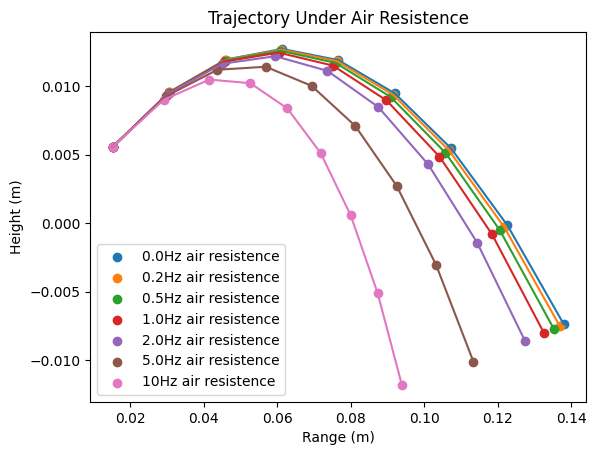

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def euler(dimless_data_array, b, g, dt):
    """
    x0 = x0 + v0x*dt
    y0 = y0 + v0y*dt
    v0x = v0x - (res*x0) * dt
    v0y = v0y - (g - res*y0) * dt
    """
    # func = [v0x, v0y, -b*v0x, -g-b*v0y]
    func = np.array([dimless_data_array[2], dimless_data_array[3], -b*dimless_data_array[2], -g-b*dimless_data_array[3]])
    
    dimless_data_array = dimless_data_array + func * dt
    #print(dimless_data_array)
    return dimless_data_array
    

def projectile(x0, y0, v0, initial_angle, b, no_pts):
    # setup
    g = 9.81
    t0 = 0
    dt = 0.01
    tau = v0/g # units of sec
    chi = v0 * tau # units of m
    x0 = x0/chi
    y0 = y0/chi
    v0x = np.cos(np.radians(initial_angle))
    v0y = np.sin(np.radians(initial_angle))
    dimless_initial_data = np.array([x0, y0, v0x, v0y]) # x0 y0 v0x v0y
    
    # getting updated data
    plot_array = []
    for pt in range(1, no_pts): 
        dimless_initial_data = euler(dimless_initial_data, b, g, dt)
        plot_array.append(dimless_initial_data) # appends dimensionless data
        t0 += dt
        
    # grabbing data to plot and re-dimensionalizing them
    x_values = []
    y_values = []
    for array in range(no_pts-1):
        plot_array[array][0] = plot_array[array][0]*chi  # units to x
        plot_array[array][1] = plot_array[array][1]*chi  # units to y
        plot_array[array][2] = plot_array[array][2]*v0  # units to vx
        plot_array[array][3] = plot_array[array][3]*v0  # units to vy
        x_values.append(plot_array[array][0])
        y_values.append(plot_array[array][1])
        #plt.scatter(plot_array[array][0], plot_array[array][1])
    #print(plot_array)
    return x_values, y_values #plot_array


if __name__=='__main__':
    # initial conditions
    b = [0.0, 0.2, 0.5, 1.0, 2.0, 5.0, 10]
    # single projectile
    """
    b = 0.0
    x, y = projectile(0.0, 0.0, 4.0, 45, b, 15)
    plt.scatter(x, y, label=f'{b}Hz air resistence')
    plt.plot(x, y)
    """
    # get trajectory for each b
    for i in b:
        x, y  = projectile(0.0, 0.0, 4.0, 20, i, 10) #array (play around with inputs)
        plt.scatter(x, y, label=f'{i}Hz air resistence')
        plt.plot(x, y)     
    plt.title("Trajectory Under Air Resistence")
    plt.xlabel("Range (m)")
    plt.ylabel("Height (m)")
    plt.legend()
    plt.show()